# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


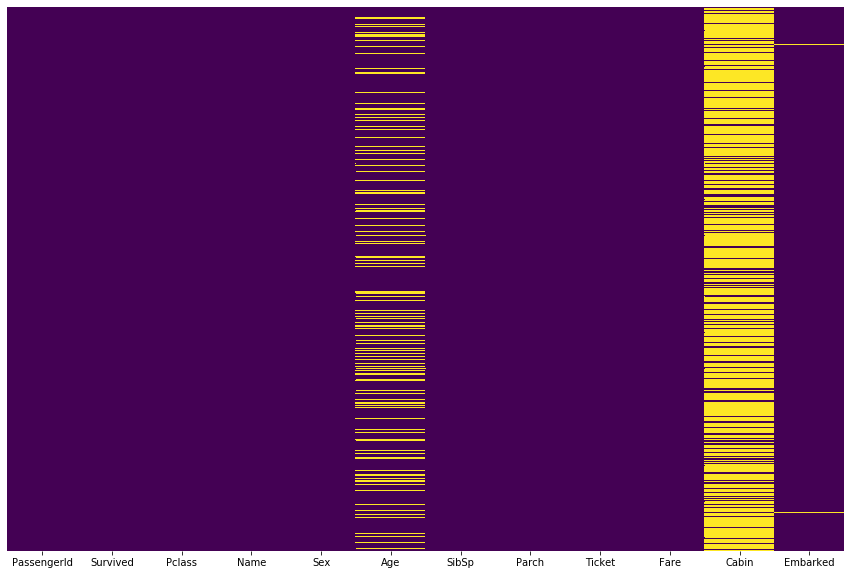

In [5]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
sns.heatmap(train.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
titanicDesc = []

for i in train.columns:
    if i == 'class' or i == 'deck':
        titanicDesc.append([i, train[i].dtypes, train[i].isna().sum(), round((((train[i].isna().sum())/(len(train)))*100),2), 
                    train[i].nunique(), list(train[i].cat.categories)[0:2]])
    else:
        titanicDesc.append([i, train[i].dtypes, train[i].isna().sum(), round((((train[i].isna().sum())/(len(train)))*100),2), 
                    train[i].nunique(), train[i].drop_duplicates().sample(2).values])
pd.DataFrame(titanicDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])    

dataFeatures dataType  null  nullPct  unique  \
0   PassengerId    int64     0     0.00     891   
1      Survived    int64     0     0.00       2   
2        Pclass    int64     0     0.00       3   
3          Name   object     0     0.00     891   
4           Sex   object     0     0.00       2   
5           Age  float64   177    19.87      88   
6         SibSp    int64     0     0.00       7   
7         Parch    int64     0     0.00       7   
8        Ticket   object     0     0.00     681   
9          Fare  float64     0     0.00     248   
10        Cabin   object   687    77.10     147   
11     Embarked   object     2     0.22       3   

                                         uniqueSample  
0                                          [250, 517]  
1                                              [1, 0]  
2                                              [3, 1]  
3   [Kalvik, Mr. Johannes Halvorsen, Artagaveytia,...  
4                                      [male, female]  
5                                        [61.0, 41.0]  
6                                              [0, 4]  
7                                              [2, 3]  
8                         [113806, STON/O 2. 3101273]  
9                                    [11.2417, 211.5]  
10                                         [D56, D30]  
11                                             [Q, C]

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

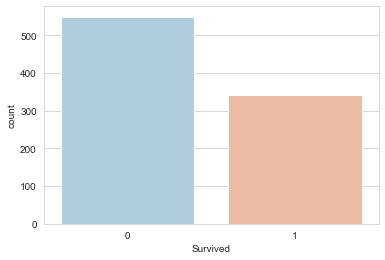

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

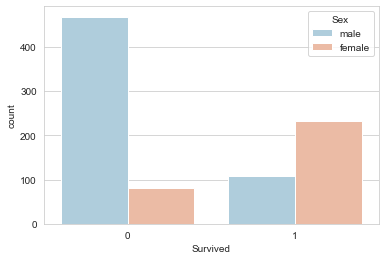

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

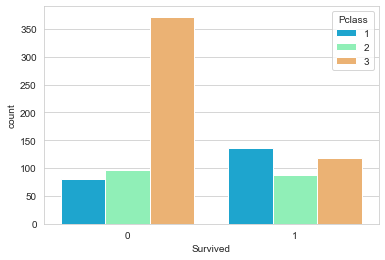

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

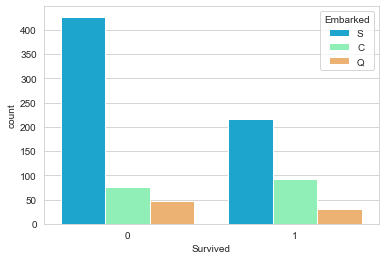

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=train,palette='rainbow')

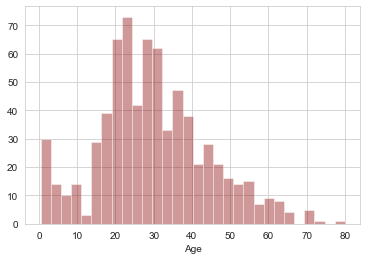

In [11]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

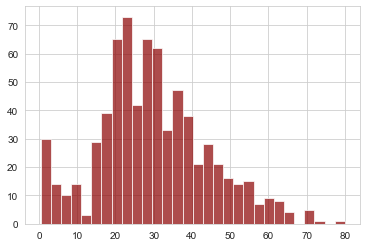

In [12]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

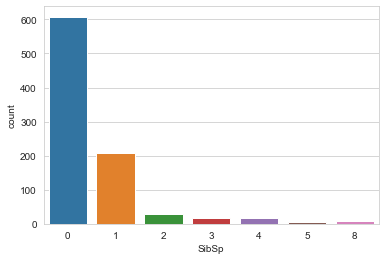

In [13]:
sns.countplot(x='SibSp',data=train)

In [14]:
train[train['SibSp'] == 8]

PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

     Age  SibSp  Parch    Ticket   Fare Cabin Embarked  
159  NaN      8      2  CA. 2343  69.55   NaN        S  
180  NaN      8      2  CA. 2343  69.55   NaN        S  
201  NaN      8      2  CA. 2343  69.55   NaN        S  
324  NaN      8      2  CA. 2343  69.55   NaN        S  
792  NaN      8      2  CA. 2343  69.55   NaN        S  
846  NaN      8      2  CA. 2343  69.55   NaN        S  
863  NaN      8      2  CA. 2343  69.55   NaN        S

In [15]:
test = pd.read_csv('titanic_test.csv')

In [16]:
test[test['SibSp'] == 8]

PassengerId  Pclass                         Name     Sex   Age  SibSp  \
188         1080       3              Sage, Miss. Ada  female   NaN      8   
360         1252       3  Sage, Master. William Henry    male  14.5      8   

     Parch    Ticket   Fare Cabin Embarked  
188      2  CA. 2343  69.55   NaN        S  
360      2  CA. 2343  69.55   NaN        S

In [17]:
train[train['Name'].str.contains('Ada')]

PassengerId  Survived  Pclass  \
98            99         1       2   
327          328         1       2   
365          366         0       3   
401          402         0       3   
426          427         1       2   
440          441         1       2   
472          473         1       2   

                                            Name     Sex   Age  SibSp  Parch  \
98          Doling, Mrs. John T (Ada Julia Bone)  female  34.0      0      1   
327                      Ball, Mrs. (Ada E Hall)  female  36.0      0      0   
365               Adahl, Mr. Mauritz Nils Martin    male  30.0      0      0   
401                              Adams, Mr. John    male  26.0      0      0   
426  Clarke, Mrs. Charles V (Ada Maria Winfield)  female  28.0      1      0   
440  Hart, Mrs. Benjamin (Esther Ada Bloomfield)  female  45.0      1      1   
472      West, Mrs. Edwy Arthur (Ada Mary Worth)  female  33.0      1      2   

           Ticket   Fare Cabin Embarked  
98         231919  23.00   NaN        S  
327         28551  13.00     D        S  
365        C 7076   7.25   NaN        S  
401        341826   8.05   NaN        S  
426          2003  26.00   NaN        S  
440  F.C.C. 13529  26.25   NaN        S  
472    C.A. 34651  27.75   NaN        S

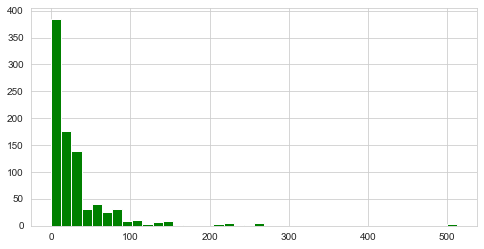

In [18]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [19]:
train[train['Fare'] > 500]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [20]:
import cufflinks as cf
cf.go_offline()

In [21]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

In [22]:
train[train['Fare'] > 510]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


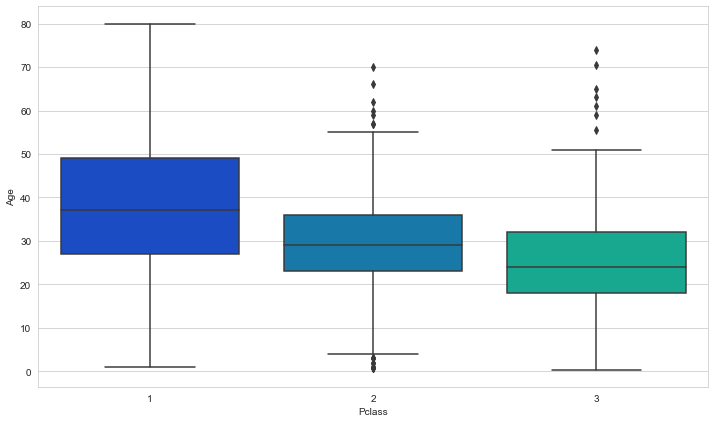

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [24]:
train.groupby('Pclass').mean()

PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550

In [25]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isna(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

Now apply that function!

In [26]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

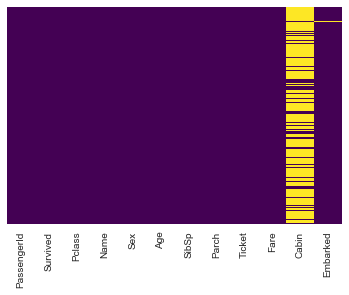

In [27]:
sns.heatmap(train.isna(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [28]:
train.drop('Cabin',axis=1,inplace=True)

In [29]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [30]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [32]:
# sex = pd.get_dummies(train['Sex'],drop_first=True)
# embark = pd.get_dummies(train['Embarked'],drop_first=True)
# pclass = pd.get_dummies(train['Pclass'],drop_first=True)
# SibSp = pd.get_dummies(train['SibSp'], drop_first =True)

In [33]:
# train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId', 'Pclass', 'SibSp'],axis=1,inplace=True)

In [34]:
# train = pd.concat([train,sex,embark, pclass, SibSp],axis=1)

In [35]:
# train.head()

In [36]:
train = pd.get_dummies(data = train, drop_first = True, columns = ['Sex','Embarked', 'Pclass', 'SibSp'])

In [37]:
train.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'Parch', 'Ticket', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'],
      dtype='object')

In [38]:
train.drop(['Name','Ticket', 'PassengerId'],axis=1,inplace=True)

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [41]:
train['Survived'].unique()

array([0, 1], dtype=int64)

## Training and Predicting

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [44]:
predictions = logmodel.predict(X_test)

In [45]:
train['Survived'].unique()

array([0, 1], dtype=int64)

In [46]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [47]:
PredictProb = logmodel.predict_proba(X_test)
PredictProb

array([[0.89880733, 0.10119267],
       [0.86705575, 0.13294425],
       [0.20131578, 0.79868422],
       [0.09260477, 0.90739523],
       [0.86496597, 0.13503403],
       [0.96431426, 0.03568574],
       [0.8880982 , 0.1119018 ],
       [0.76768974, 0.23231026],
       [0.92749535, 0.07250465],
       [0.32938453, 0.67061547],
       [0.22855293, 0.77144707],
       [0.04147906, 0.95852094],
       [0.89883992, 0.10116008],
       [0.34001694, 0.65998306],
       [0.89850044, 0.10149956],
       [0.88101739, 0.11898261],
       [0.11000926, 0.88999074],
       [0.13780441, 0.86219559],
       [0.39205156, 0.60794844],
       [0.90528348, 0.09471652],
       [0.8986778 , 0.1013222 ],
       [0.88080004, 0.11919996],
       [0.65239983, 0.34760017],
       [0.72177277, 0.27822723],
       [0.90740517, 0.09259483],
       [0.51619565, 0.48380435],
       [0.41045947, 0.58954053],
       [0.42839822, 0.57160178],
       [0.86785877, 0.13214123],
       [0.68994183, 0.31005817],
       [0.

Let's move on to evaluate our model!

In [48]:
#If we want to adjust the treshold
predictions = []
for pred in PredictProb[:,0]:
    if(pred > 0.30):
        predictions.append(0)
    else:
        predictions.append(1)

## Evaluation

We can check precision,recall,f1-score using classification report!

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

In [50]:
X_train.head()

Age  Parch    Fare  Sex_male  Embarked_Q  Embarked_S  Pclass_2  \
807  18.0      0   7.775         0           0           1         0   
651  18.0      1  23.000         0           0           1         1   
2    26.0      0   7.925         0           0           1         0   
690  31.0      0  57.000         1           0           1         0   
196  25.0      0   7.750         1           1           0         0   

     Pclass_3  SibSp_1  SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  
807         1        0        0        0        0        0        0  
651         0        0        0        0        0        0        0  
2           1        0        0        0        0        0        0  
690         0        1        0        0        0        0        0  
196         1        0        0        0        0        0        0

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       163
           1       0.96      0.46      0.62       104

    accuracy                           0.78       267
   macro avg       0.85      0.72      0.74       267
weighted avg       0.83      0.78      0.76       267



In [52]:
con = pd.DataFrame(data=confusion_matrix(y_test, predictions), columns =['P No', 'P Yes'], index = ['A No', 'A Yes'])
print(con)

       P No  P Yes
A No    161      2
A Yes    56     48


In [53]:
print(sum(predictions))

50


In [54]:
accuracy_score(y_test, predictions)

0.7827715355805244

In [55]:
matthews_corrcoef(y_test, predictions)

0.5615670200443504

In [56]:
log_loss(y_test, PredictProb)

0.4306039857923613

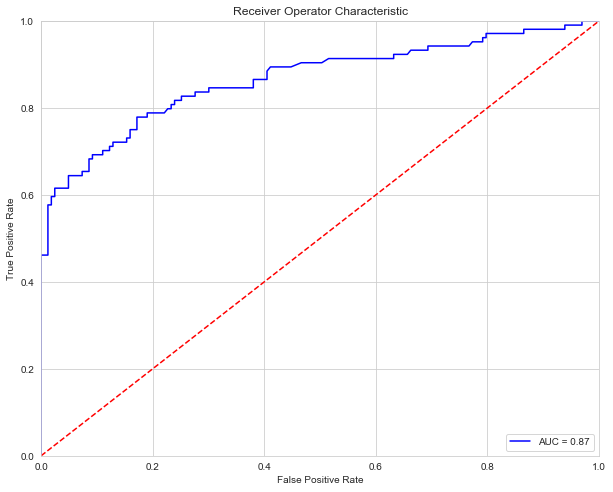

In [58]:
preds = PredictProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## Great Job!

In [59]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,sm.add_constant(X_train))
result=logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.445983
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.328     
Dependent Variable: Survived         AIC:              584.8033  
Date:               2020-05-27 15:08 BIC:              651.2974  
No. Observations:   622              Log-Likelihood:   -277.40   
Df Model:           14               LL-Null:          -412.87   
Df Residuals:       607              LLR p-value:      1.3169e-49
Converged:          0.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         4.0942    0.5928    6.9071  0.0000   2.9324   5.2560
Age          -0.0427    0.0103   -4.1401  0.0000  -0.0629  -0.0225
Parch        -0.1685    0.147

C:\Users\Pavilion\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Users\Pavilion\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [60]:
X_train

Age  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  Pclass_2  \
807  18.0      0   7.7750         0           0           1         0   
651  18.0      1  23.0000         0           0           1         1   
2    26.0      0   7.9250         0           0           1         0   
690  31.0      0  57.0000         1           0           1         0   
196  25.0      0   7.7500         1           1           0         0   
..    ...    ...      ...       ...         ...         ...       ...   
576  34.0      0  13.0000         0           0           1         1   
840  20.0      0   7.9250         1           0           1         0   
338  45.0      0   8.0500         1           0           1         0   
524  25.0      0   7.2292         1           0           0         0   
865  42.0      0  13.0000         0           0           1         1   

     Pclass_3  SibSp_1  SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  
807         1        0        0        0        0        0        0  
651         0        0        0        0        0        0        0  
2           1        0        0        0        0        0        0  
690         0        1        0        0        0        0        0  
196         1        0        0        0        0        0        0  
..        ...      ...      ...      ...      ...      ...      ...  
576         0        0        0        0        0        0        0  
840         1        0        0        0        0        0        0  
338         1        0        0        0        0        0        0  
524         1        0        0        0        0        0        0  
865         0        0        0        0        0        0        0  

[622 rows x 14 columns]